In [1]:
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=4
mpl.rcParams['lines.markersize']=3
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize']=30
mpl.rcParams['legend.fontsize']=30
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, getUniqueIDFromParams
from optvaeutils.viz import getName

In [2]:
#DSET = 'rcv2'
namemap_rcv2   = {}
namemap_wiki   = {}
namemap_rcv2['pl-0-finopt'] = '1-M100'# 'p1-$\\psi_{\\text{opt.}}$'
namemap_rcv2['pl-0-none'] = '1-M1' #'p1'
namemap_rcv2['pl-2-none'] =  '3-M1'#'p3'
namemap_rcv2['pl-2-finopt'] = '3-M100'# 'p3-$\\psi_{\\text{opt.}}$'

namemap_wiki['pl-0-finopt'] = '1-M100'# 'p1-$\\psi_{\\text{opt.}}$'
namemap_wiki['pl-0-none'] = '1-M1' #'p1'
namemap_wiki['pl-2-none'] =  '3-M1'#'p3'
namemap_wiki['pl-2-finopt'] = '3-M100'# 'p3-$\\psi_{\\text{opt.}}$'

colorFinal = {}
colorFinal['pl-0-none']    = 'r'
colorFinal['pl-0-finopt']  = 'b'
colorFinal['pl-2-none']    = 'g'
colorFinal['pl-2-finopt']  = 'k'
markerFinal = {}
markerFinal['pl-0-none']   =  '>'
markerFinal['pl-0-finopt']  =  '<'
markerFinal['pl-2-none']   =  'o'
markerFinal['pl-2-finopt']  =  's'


results = {}
results['rcv2'] = {}
results['wikicorp'] = {}
for f in glob.glob('../../expt/evaluateJac/*.h5'):
    dataset = f.split('-')[0].split('/')[-1]
    setup   = f.split('pl-')[1].split('-jac')[0]
    dd = loadHDF5(f)
    results[dataset][setup]  = dd['svals']
    print dataset, setup

wikicorp 0-finopt
wikicorp 0-none
rcv2 2-none
rcv2 2-finopt
rcv2 0-finopt
wikicorp 2-finopt
wikicorp 2-none
rcv2 0-none


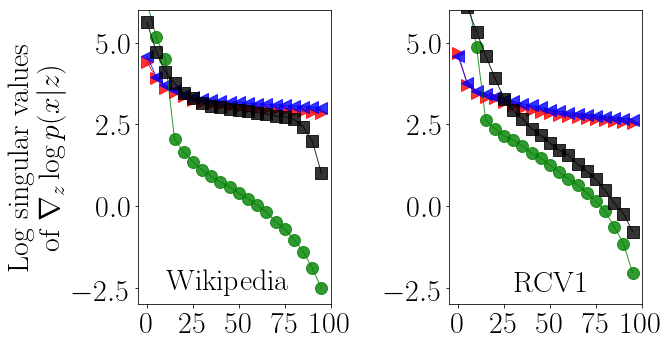

In [3]:
fig,axlist     = plt.subplots(1,2,figsize=(10,5.5))  
for idx, dataset in enumerate(['wikicorp','rcv2']):
    ax         = axlist.ravel()[idx]
    #if dataset=='wikicorp':
    #    ax.set_title('Wikipedia')
    #else:
    #    ax.set_title('RCV2')
    for setup in ['0-none','0-finopt','2-none','2-finopt']:
        if'rcv2' in dataset:
            name = namemap_rcv2['pl-'+setup]
        else:
            name = namemap_rcv2['pl-'+setup]
        MARKER = markerFinal['pl-'+setup]
        COLOR  = colorFinal['pl-'+setup]
        svals  = results[dataset][setup]
        Y = np.sort(np.log(svals))[::-1]
        X = np.arange(0,Y.shape[0])
        #ax.plot(X,Y,'-',marker=MARKER,alpha=0.8,color=COLOR,ms=12,lw=1,label = name)
        ax.plot(X[::5],Y[::5],'-',marker=MARKER,alpha=0.8,color=COLOR,ms=12,lw=1,label = name)
        if 'wikicorp' in dataset:
            ax.set_ylim([-3,6])
        else:
            ax.set_ylim([-3,6])
        ax.set_xticks(X[::25].tolist()+[100])
fname = 'javex_svd.pdf'
#plt.legend(loc='upper center', bbox_to_anchor=(-0.3, 1.1),ncol=2,frameon=True,columnspacing=0.1, markerscale=2)
#plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.),ncol=2,frameon=False,columnspacing=0.1, markerscale=2)

axlist[0].set_ylabel('Log singular values\n of $\\nabla_z\\log p(x|z)$')
#fig.text(0.5, 0.01, 'Dimensions of $z$', ha='center')
fig.text(0.35, 0.2, 'Wikipedia', ha='center')
fig.text(0.8, 0.2, 'RCV1', ha='center')
plt.tight_layout()
plt.savefig(fname, bbox_inches='tight')